# Analysis of last.fm reports

Now we'll analyze the stats for my user, `fergomes`.

The first thing you need to do to perform this study is collect all the tracks for your user (or whatever user you want to analyze). This can be done running the python script `lastfm_get_user_historical_tracks.py` on this repo (go to the repo main page and go through the README).

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/.
If you feel interested on using the service but doesn't know how to scrobble your tracks, check here: https://www.last.fm/about/trackmymusic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime
import csv
from os import listdir, makedirs
from os.path import isfile, join, exists
import shutil
import datetime
from pytz import timezone
import numpy as np

In [2]:
user = 'fergomes'

directory = 'export_' + str(user) + '/'
name_file = 'historical_tracks_'

def get_last_file(user, mypath, name_file):
    if not exists(mypath):
        makedirs(mypath)
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))
                                            if str(name_file) + str(user) in join(mypath, f)
                                            if 'partial' not in join(mypath, f)]
    if onlyfiles == []:
        return None
    else:
        return max(onlyfiles)

In [3]:
file = get_last_file(user, directory, name_file)

if file == None:
    print('No file found.')

In [4]:
df = pd.read_csv(directory + file, sep=',')

In [5]:
br = timezone('America/Sao_Paulo')
sp = timezone('Europe/Madrid')

date_moved = int(datetime.datetime(2017,2,6,0,0).timestamp())

list_date_formatted = []

for i in range(len(df)):
    date_epoch = int(df.iloc[i]['date'])
    if user == 'fergomes' and int(date_epoch) > date_moved:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=sp)
    else:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=br)
    list_date_formatted.append(date_f)

df['date_formatted'] = list_date_formatted
df['weekday'] = [datetime.date(idx.year, idx.month, idx.day).strftime('%A') for idx in df['date_formatted']]
df['weekday_num'] = [datetime.date(idx.year, idx.month, idx.day).isoweekday() for idx in df['date_formatted']]
df['hour'] = [idx.hour for idx in df['date_formatted']]
df['month'] = [idx.month for idx in df['date_formatted']]
df['year'] = [idx.year for idx in df['date_formatted']]

In [6]:
df.head(10)

,#scrobble,date,date_fmt,mbid,artist,track,album,loved,tags,danceability,...,instrumentalness,liveness,valence,tempo,date_formatted,weekday,weekday_num,hour,month,year
0,1,1108290000,2/13/05 10:20,1a936dfb-83e6-30f2-b776-7ab40f4a0b8f,Oasis,Pass Me Down the Wine,The Importance of Being Idle,0,"['britpop', 'rock', 'british', 'alternative', ...",NaN,...,NaN,NaN,NaN,NaN,2005-02-13 08:20:00-02:00,Sunday,7,8,2,2005
1,2,1108290000,2/13/05 10:20,0766f36b-dd65-394d-a511-7aac61687dc1,Oasis,Hey Now!,(What's the Story) Morning Glory?,0,"['britpop', 'rock', 'british', 'alternative', ...",0.140,...,0.001420,0.3570,0.212,202.453,2005-02-13 08:20:00-02:00,Sunday,7,8,2,2005
2,3,1140643055,2/22/06 21:17,02eb39ae-de6d-314d-8554-af191cd9038e,Anja Garbarek,Beyond my control,NaN,0,"['trip-hop', 'female vocalists', 'norwegian', ...",0.693,...,0.000053,0.2170,0.397,115.946,2006-02-22 18:17:35-03:00,Wednesday,3,18,2,2006
3,4,1140643375,2/22/06 21:22,144eb69f-f8da-3e32-aa4e-c909785a5651,Anja Garbarek,The Last Trick,Briefly Shaking,0,"['trip-hop', 'female vocalists', 'norwegian', ...",0.318,...,0.000427,0.1060,0.174,92.071,2006-02-22 18:22:55-03:00,Wednesday,3,18,2,2006
4,5,1140643675,2/22/06 21:27,01283f7f-de87-4cc2-824e-ab1d448964a3,Basement Jaxx,Good Luck,NaN,0,"['electronic', 'dance', 'house', 'electronica'...",0.577,...,0.000000,0.3440,0.572,153.985,2006-02-22 18:27:55-03:00,Wednesday,3,18,2,2006
5,6,1140644060,2/22/06 21:34,04f8a2d4-9b37-34d2-8358-4d41dd7b048a,Goldfrapp,Ride a White Horse,Supernature,0,"['electronic', 'trip-hop', 'female vocalists',...",0.674,...,0.140000,0.0797,0.362,121.607,2006-02-22 18:34:20-03:00,Wednesday,3,18,2,2006
6,7,1140644293,2/22/06 21:38,00aff98d-7993-3498-9010-cd6b40199ac7,Goldfrapp,Ooh La La,Supernature,1,"['electronic', 'trip-hop', 'female vocalists',...",0.480,...,0.642000,0.1160,0.199,144.514,2006-02-22 18:38:13-03:00,Wednesday,3,18,2,2006
7,8,1140644512,2/22/06 21:41,06adcc45-d37c-3437-9a9d-b3848ed3d14a,Goldfrapp,Strict Machine,NaN,0,"['electronic', 'trip-hop', 'female vocalists',...",0.634,...,0.160000,0.1120,0.450,125.998,2006-02-22 18:41:52-03:00,Wednesday,3,18,2,2006
8,9,1140644734,2/22/06 21:45,01b30b41-59b2-36df-be31-6a5ff77c1889,Oasis,Stop Crying Your Heart Out,Heathen Chemistry,0,"['britpop', 'rock', 'british', 'alternative', ...",0.379,...,0.000002,0.1180,0.083,74.983,2006-02-22 18:45:34-03:00,Wednesday,3,18,2,2006
9,10,1140644998,2/22/06 21:49,e5070101-0211-3e47-81b4-6c07347ebd98,Oasis,weight of the world,NaN,0,"['britpop', 'rock', 'british', 'alternative', ...",NaN,...,NaN,NaN,NaN,NaN,2006-02-22 18:49:58-03:00,Wednesday,3,18,2,2006


In [7]:
df.describe()

,#scrobble,date,loved,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,weekday_num,hour,month,year
count,80254.000000,8.025400e+04,80254.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,73482.000000,80254.000000,80254.000000,80254.000000,80254.000000
mean,40127.500000,1.443218e+09,0.072221,0.505332,0.643090,5.241896,-8.531573,0.669293,0.054999,0.269832,0.150860,0.211656,0.507816,122.501884,3.525706,14.655905,6.253807,2015.255439
std,23167.478589,1.137475e+08,0.258855,0.164190,0.254956,3.531276,5.350516,0.470471,0.049407,0.326932,0.293064,0.176643,0.259613,28.207002,1.876604,4.837126,3.346085,3.617325
min,1.000000,1.108290e+09,0.000000,0.000000,0.000098,0.000000,-47.493000,0.000000,0.000000,0.000001,0.000000,0.009670,0.000000,0.000000,1.000000,0.000000,1.000000,2005.000000
25%,20064.250000,1.392691e+09,0.000000,0.390000,0.482000,2.000000,-10.119000,0.000000,0.032900,0.008080,0.000003,0.098900,0.297000,102.121000,2.000000,11.000000,3.000000,2014.000000
50%,40127.500000,1.454441e+09,0.000000,0.509000,0.701000,5.000000,-7.112000,1.000000,0.040600,0.096000,0.000940,0.135000,0.506000,122.099500,3.000000,15.000000,6.000000,2016.000000
75%,60190.750000,1.535375e+09,0.000000,0.618000,0.851000,9.000000,-5.049000,1.000000,0.056400,0.473000,0.091000,0.289000,0.720000,139.213000,5.000000,18.000000,9.000000,2018.000000
max,80254.000000,1.592076e+09,1.000000,0.979000,0.999000,11.000000,4.708000,1.000000,0.956000,0.996000,0.987000,0.997000,0.991000,238.895000,7.000000,23.000000,12.000000,2020.000000


In [8]:
print('COLUMN           | COMPLETENESS\n-----------------------------------')
for col in df.columns:
    total = len(df)
    nulls = df[col].isnull().sum(axis = 0)
    txt = '{col:<16} | {b:.2%} complete'.format(col=col, b = (1 - nulls/total))
    print(txt)

COLUMN           | COMPLETENESS
-----------------------------------
#scrobble        | 100.00% complete
date             | 100.00% complete
date_fmt         | 100.00% complete
mbid             | 77.96% complete
artist           | 100.00% complete
track            | 100.00% complete
album            | 97.06% complete
loved            | 100.00% complete
tags             | 100.00% complete
danceability     | 91.56% complete
energy           | 91.56% complete
key              | 91.56% complete
loudness         | 91.56% complete
mode             | 91.56% complete
speechiness      | 91.56% complete
acousticness     | 91.56% complete
instrumentalness | 91.56% complete
liveness         | 91.56% complete
valence          | 91.56% complete
tempo            | 91.56% complete
date_formatted   | 100.00% complete
weekday          | 100.00% complete
weekday_num      | 100.00% complete
hour             | 100.00% complete
month            | 100.00% complete
year             | 100.00% complete


As we can see, most of our columns has a low percentage of `NaN` values. The largest one is MBID, but we won't use it at the moment.

Since our dataset is good (for now, we'll examine further the tags that will become a sparse matrix), we are currently not gonna work on null values. Let's run basic statistics.

## Top 10 everything!

First, let's build simple charts with top 10 artists, albums, tracks and tags for the whole period.

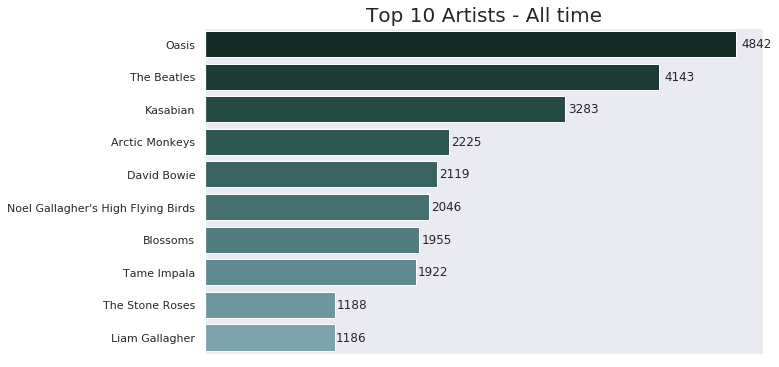

In [9]:
top_artists = Counter(df['artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists]
y_artists = [item[1] for item in top_100_artists]

sns.set()
plt.subplots(figsize=(10, 6))

palette = sns.cubehelix_palette(15, start=-.8, rot=0.2, reverse=True)

artists_plot = sns.barplot(y_artists[:10], x_artists[:10], palette=palette)
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

    top_albums = Counter(df['album'])

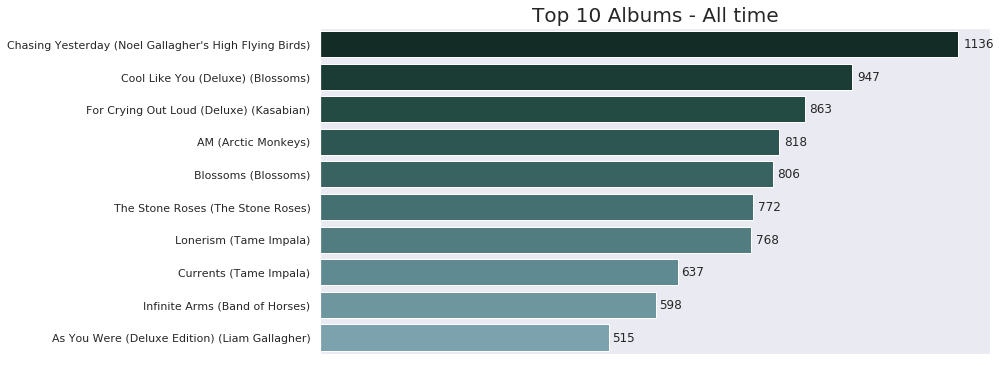

In [10]:
top_albums = Counter(df['album'])
top_100_albums = top_albums.most_common(100)

x_albums = [item[0] for item in top_100_albums]
y_albums = [item[1] for item in top_100_albums]

x_albums_with_artist = []
for i in range(len(x_albums)):
    try:
        album = x_albums[i]
        artist = df[df.album == album]['artist'].mode()[0]
        album_artist = album + ' (' + artist + ')'
        x_albums_with_artist.append(album_artist)
    except: x_albums_with_artist.append("nan")

plt.subplots(figsize=(12, 6))
albums_plot = sns.barplot(y_albums[1:11], x_albums_with_artist[1:11], palette=palette)
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

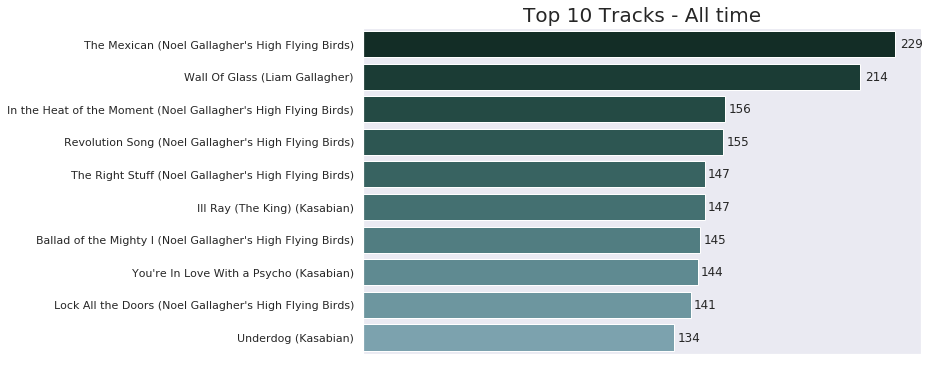

In [11]:
top_tracks = Counter(df['track'])
top_100_tracks = top_tracks.most_common(100)

x_tracks = [item[0] for item in top_100_tracks]
y_tracks = [item[1] for item in top_100_tracks]


x_tracks_with_artist = []
for i in range(len(x_albums)):
    try:
        track = x_tracks[i]
        artist = df[df.track == track]['artist'].mode()[0]
        track_artist = track + ' (' + artist + ')'
        x_tracks_with_artist.append(track_artist)
    except: x_tracks_with_artist.append("nan")
        
        
plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks[:10], x_tracks_with_artist[:10], palette=palette)
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

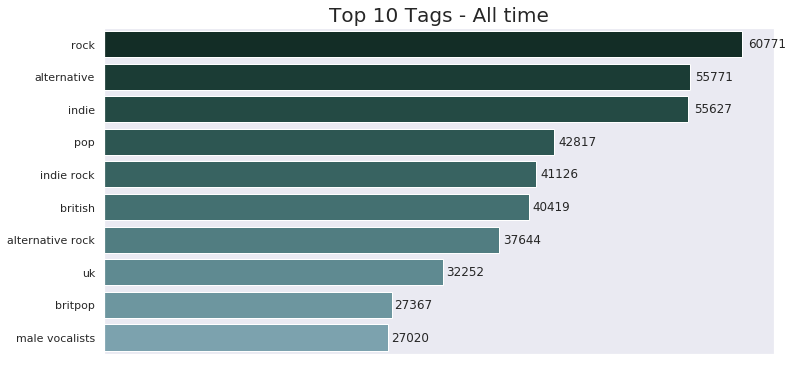

In [12]:
import ast

tags_df = df['tags']
count_tags = {}

for i in range(len(df)):
    str1 = ast.literal_eval(tags_df.iloc[i])
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags]
y_tags = [item[1] for item in top_100_tags]

plt.subplots(figsize=(12, 6))
tags_plot = sns.barplot(y_tags[:10], x_tags[:10], palette = palette)
tags_plot.axes.get_xaxis().set_visible(False)
tags_plot.set_title('Top 10 Tags - All time', fontsize=20)
for p in tags_plot.patches:
    tags_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

### Last week and Last month comparisons

This is another very basic comparison, but anyway let's do it.

In [13]:
today = df.iloc[-1]['date_formatted']

week = datetime.timedelta(days=7)
last_week = today - week
two_weeks_ago = last_week - week

In [14]:
last_week_scrobbles = df[df['date_formatted'] > last_week]

two_weeks_ago_scrobbles = df[df['date_formatted'] < last_week]
two_weeks_ago_scrobbles = two_weeks_ago_scrobbles[two_weeks_ago_scrobbles['date_formatted'] > two_weeks_ago]

weekly_scrobbles = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_scrobbles),
                    last_week.strftime('%m/%d'): len(last_week_scrobbles)}

In [15]:
last_week_artists = pd.unique(last_week_scrobbles['artist'])
two_weeks_ago_artists = pd.unique(two_weeks_ago_scrobbles['artist'])

weekly_artists = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_artists),
                  last_week.strftime('%m/%d'): len(last_week_artists)}

In [16]:
last_week_albums = pd.unique(last_week_scrobbles['album'])
two_weeks_ago_albums = pd.unique(two_weeks_ago_scrobbles['album'])

weekly_albums = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_albums),
                 last_week.strftime('%m/%d'): len(last_week_albums)}

Text(0.5, 1.0, '# of albums - WoW')

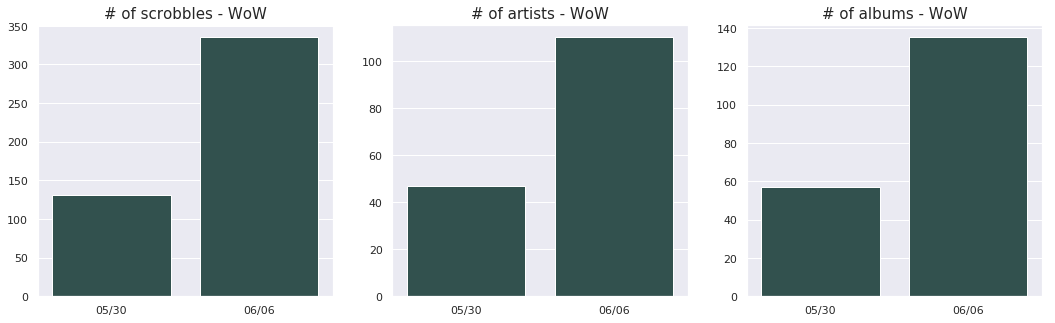

In [17]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = weekly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - WoW', fontsize=15)

plt.subplot(1, 3, 2)
lists = weekly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - WoW', fontsize=15)

plt.subplot(1, 3, 3)
lists = weekly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - WoW', fontsize=15)

In [18]:
month = datetime.timedelta(days=30)
last_month = today - month
two_months_ago = last_month - month

In [19]:
last_month_scrobbles = df[df['date_formatted'] > last_month]

two_months_ago_scrobbles = df[df['date_formatted'] < last_month]
two_months_ago_scrobbles = two_months_ago_scrobbles[two_months_ago_scrobbles['date_formatted'] > two_months_ago]

monthly_scrobbles = {two_months_ago.strftime('%m/%d'): len(two_months_ago_scrobbles),
                     last_month.strftime('%m/%d'): len(last_month_scrobbles)}

In [20]:
last_month_artists = pd.unique(last_month_scrobbles['artist'])
two_months_ago_artists = pd.unique(two_months_ago_scrobbles['artist'])

monthly_artists = {two_months_ago.strftime('%m/%d'): len(two_months_ago_artists),
                   last_month.strftime('%m/%d'): len(last_month_artists)}

In [21]:
last_month_albums = pd.unique(last_month_scrobbles['album'])
two_months_ago_albums = pd.unique(two_months_ago_scrobbles['album'])

monthly_albums = {two_months_ago.strftime('%m/%d'): len(two_months_ago_albums),
                  last_month.strftime('%m/%d'): len(last_month_albums)}

Text(0.5, 1.0, '# of albums - MoM')

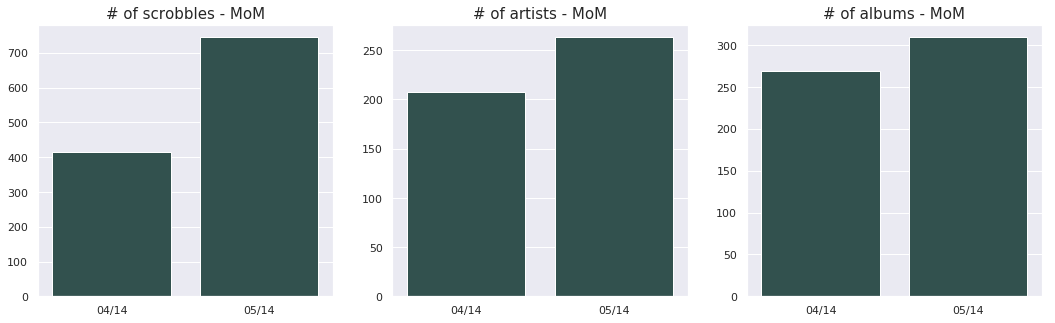

In [22]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = monthly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - MoM', fontsize=15)

plt.subplot(1, 3, 2)
lists = monthly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - MoM', fontsize=15)

plt.subplot(1, 3, 3)
lists = monthly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color='#2D5652')
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - MoM', fontsize=15)

## How concentrated is my taste?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

We'll consider just the top 100 of each item, to keep the charts clean.

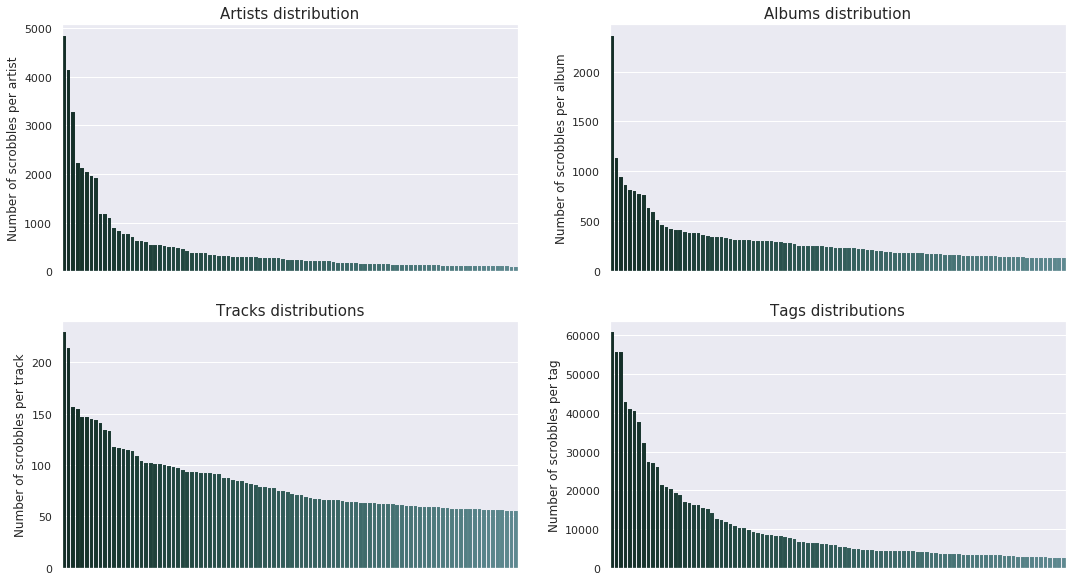

In [23]:
palette_conc = sns.cubehelix_palette(200, start=-.8, rot=0.2, reverse=True)
plt.subplots(figsize=(18, 10))

plt.subplot(2, 2, 1)
artists_dist = sns.barplot(x_artists, y_artists, palette = palette_conc)
plt.setp(artists_dist.patches, linewidth=0.05)
artists_dist.set_ylabel('Number of scrobbles per artist')
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(2, 2, 2)
albums_dist = sns.barplot(x_albums_with_artist, y_albums, palette = palette_conc)
plt.setp(albums_dist.patches, linewidth=0.05)
albums_dist.set_ylabel('Number of scrobbles per album')
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(2, 2, 3)
tracks_dist = sns.barplot(x_tracks_with_artist, y_tracks, palette = palette_conc)
plt.setp(tracks_dist.patches, linewidth=0.05)
tracks_dist.set_ylabel('Number of scrobbles per track')
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.subplot(2, 2, 4)
tags_dist = sns.barplot(x_tags, y_tags, palette = palette_conc)
plt.setp(tags_dist.patches, linewidth=0.05)
tags_dist.set_ylabel('Number of scrobbles per tag')
tags_dist.axes.get_xaxis().set_visible(False)
tags_dist.set_title('Tags distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists and tags (the curves are more dramatic), however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed however they are albums from the same artists. (To be studied)

_Soundtrack for this first part of the study: [The Kinks](https://open.spotify.com/user/ohhrosie/playlist/4bW4B1ZAJL2QeVxjmz3K4K?si=gzblx6t9R8OMJL2wgttdjw)_

![Kinks](https://i.imgur.com/KcJd5eQb.png)





## How I listen to music over time

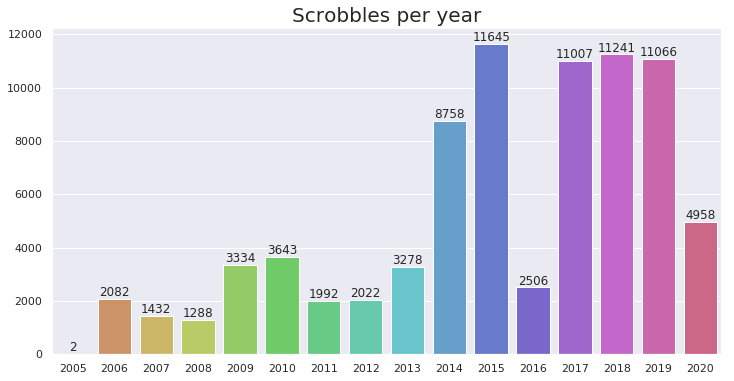

In [24]:
years = sorted(list(df['year'].unique()))
tracks_per_year = [len(df[df['year'] == i]) for i in years]

palette_years = sns.color_palette('hls', len(years))

sns.set()
plt.subplots(figsize=(12, 6))
yearly_tracks = sns.barplot(years, tracks_per_year, palette=palette_years)
yearly_tracks.set_title('Scrobbles per year', fontsize=20)
for p in yearly_tracks.patches:
    yearly_tracks.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

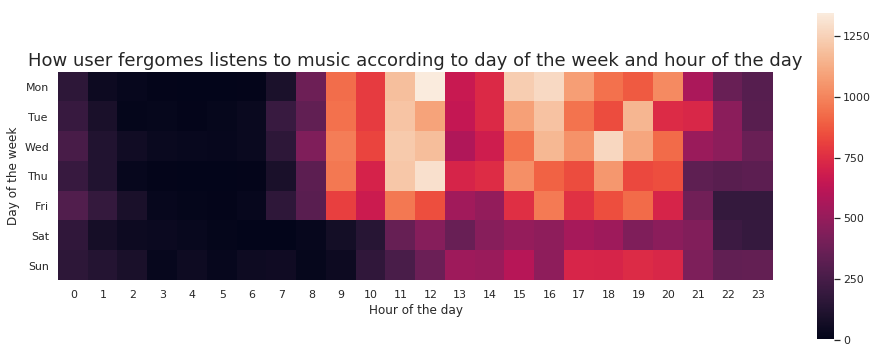

In [25]:
matrix_hour_weekday = df.pivot_table(index='weekday_num', 
               columns='hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

As per the heatmap above, I'm a person that listens to music mostly during working days and hours. As I work at an office and have regular working hours, we can see that I still listen to music when at home during the night.

_Soundtrack for this first part of the study: [The Blossoms](https://open.spotify.com/album/0yO5Mwu2oDdGbeRFpAaBGa?si=yxsQbO8eStmMsBK7eDVvMA)_

![Blossoms](https://i.imgur.com/KHt35a8b.jpg)

### Obsessions over time

Now I want to know the tracks that were on repeat for every year.

But the first question is: am I a obsession-track-on-repeat? There are people that clearly listens to the same track over and over when they are in love with it, but am I like this? We have to analyze it.

How many times do I have to listen to the same track to say it's an obsession?

We'll run some studies.

In [26]:
scrobbles_per_year = {}

for i in years:
    scrobbles_per_year['tracks_' + str(i)] = df.loc[df['year'] == i]

In [27]:
dict_top_tracks = {}
for key, value in scrobbles_per_year.items():
    count = 0
    old_track = ''
    dict_tracks_per_year = {}
    for i in range(len(value['track'])):
        new_track = value.iloc[i]['track']
        if old_track == new_track:
            count += 1
            if count > 2: dict_tracks_per_year[(value.iloc[i]['artist'], value.iloc[i]['track'])] = count
        else:
            count = 0
        old_track = new_track
    sorted_dict = sorted(dict_tracks_per_year.items(), key=lambda x: x[1], reverse=True)
    dict_top_tracks[key[-4:]] = sorted_dict[:5]

In [28]:
for key, value in dict_top_tracks.items():
    if len(value) > 0:
        print('In', key, 'the most listened tracks on repeat were:')
        for item in value:
            print('"' + item[0][1] + '" by', item[0][0], item[1], 'times')
        print('')

In 2007 the most listened tracks on repeat were:
"The Mating Game" by Bitter:Sweet 3 times

In 2009 the most listened tracks on repeat were:
"Me Plus One" by Kasabian 10 times
"Club Foot" by Kasabian 10 times
"Underdog" by Kasabian 9 times
"Vlad the Impaler" by Kasabian 8 times
"Breakout" by Foo Fighters 8 times

In 2010 the most listened tracks on repeat were:
"Go Do" by Jónsi 8 times
"Animal Arithmetic" by Jónsi 8 times
"Boy Lilikoi" by Jónsi 8 times
"Sinking Friendships" by Jónsi 8 times
"Dia Perfeito" by Cachorro Grande 6 times

In 2011 the most listened tracks on repeat were:
"Beatles and Stones" by Beady Eye 12 times
"Millionaire" by Beady Eye 12 times
"The Roller" by Beady Eye 12 times
"My Fantasy" by Miles Kane 11 times
"If I Had a gun" by Noel Gallagher's High Flying Birds 11 times

In 2012 the most listened tracks on repeat were:
"Teddy Picker" by Arctic Monkeys 8 times
"Under My Thumb" by The Rolling Stones 3 times
"Undercover Martyn" by Two Door Cinema Club 3 times
"Fire" b

_Soundtrack for this first part of the study: [Modest Mouse](https://open.spotify.com/album/5SbcupirEParczvqqyUPXL?si=DLNp2lX6Q82fDntFRM_fsQ)_

![The Postal Service](https://imgur.com/ImSOx5pt.png)

### Let's analyze a little bit the tags

Now I want to understand what genres I'm listening to. This is given by TAGS on last.fm system. Any user can tag a song/artist/album as they want, so they are not **official** genres but as defined by the users. The top tags of an artist is the one that users tag the most, so although it's not 100% official, it should be precise enough for popular artists.

We will build a vector of tags.

First we will analyze some tags for some artists.

Then we build a list with the unique tags. Then, for each scrobble, it will analyze if the tag is present. If it is, it will flag with 1 (on the position that tag is on the unique tags list) and, if not, with a 0.

In [ ]:
df.iloc[0]['tags']

For each tag cell, we can see there's a list that is interpreted as a string. We have to turn these strings into actual lists.

Then, we'll build a mega list with all the unique tags for all artists (so later we build a matrix)

In [ ]:
import ast

# I analyzed the tags beforehand and checked that, usually, tags with over 3 letters or less are pure noise and
# doesn't bring value to our analysis, with the exception of the below that we'll include
list_short = ['uk', 'mpb', 'pop', '20s', '30s','40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s', 
              'emo', 'mod', 'rap', 'rnb', 'usa', 'dub', 'ska', 'r&b', 'idm', 'edm']
all_tags_row = []

for i in range(len(df)):
    tag_list = ast.literal_eval(df['tags'][i])
    all_tags_row.append(tag_list)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

test = pd.Series(all_tags_row)

mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(test),
                   columns=mlb.classes_,
                   index=test.index)

In [ ]:
res.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

cols = int(round(len(res.iloc[0])/10))

tsvd = TruncatedSVD(n_components=cols)
X_sparse_tsvd = tsvd.fit(res).transform(res)
X_sparse_tsvd

_Soundtrack for this first part of the study: [Band of Horses](https://open.spotify.com/album/08fkw9uDP2KET6cPIl74Xo?si=YedcmWXjSuKg4ddN5saUfQ)_

![Band of Horses](https://i.imgur.com/r9aLICc.jpg?1)

Now we'll use K Means (using sklearn) to cluster similar artists according to the tags they have. We will define 10 clusters and see how they are grouped.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

num_clusters = 8

km = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, batch_size=100, verbose=1, 
                     compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, n_init=3, 
                     reassignment_ratio=0.1)

%time km.fit(res)

clusters = km.labels_.tolist()

Here we create a dictionary of artist and its cluster assignment.

In [ ]:
artists = { 'artist': list(df['artist']), 'cluster': clusters}
frame = pd.DataFrame(artists, index = [clusters] , columns = ['artist', 'cluster'])
frame['cluster'].value_counts() # number of scrobbles per cluster (clusters from 0 to 4)

Here is some indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [ ]:
print('Top tags per cluster:\n')
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
dict_cluster_tags = {}
dict_cluster_artists = {}

In [ ]:
for i in range(num_clusters):
    list_titles = []
    print('\nCluster %d words:' % i, end='')
    
    for ind in order_centroids[i, :6]:
        print(' %s' % all_tags_row[ind], end=',')
        try: dict_cluster_tags[i].append(all_tags_row[ind])
        except: dict_cluster_tags[i] = [all_tags_row[ind]]
    
    print('\n\nCluster %d artists: ' % i, end='')
    for title in frame.loc[i]['artist'].values.tolist():
        if title not in list_titles and len(list_titles) <= 50:
            list_titles.append(title)
            try: dict_cluster_artists[i].append(title)
            except: dict_cluster_artists[i] = [title]
    for i in range(0,len(list_titles)):
        print(list_titles[i], end=', ') 
    print('\n\n=======================================================================================') 
    
print('\n\n')

_Soundtrack for this first part of the study: [The Postal Service](https://open.spotify.com/album/4ssF0ppdJnMTtL2hg1CLKX?si=dUOpusnlRCOEoyNZ4oAhnA)_

![The Postal Service](https://imgur.com/f5hmnPat.png)

In [ ]:
df_out = res.T.dot(res)

np.fill_diagonal(df_out, 0)

df_out

In [ ]:
from sklearn.cluster import SpectralClustering

num_clusters = 8

km = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors',
                           assign_labels='kmeans', eigen_solver='arpack')

%time km.fit_predict(df_out)

clusters = km.labels_.tolist()
clusters

In [ ]:
import json
import pylast
import requests
from collections import defaultdict, Counter

def get_credentials():
    with open('secrets.json', 'r') as file:
        jsonfile = json.load(file)
        API_KEY = jsonfile['API']['API_KEY']
        API_SECRET = jsonfile['API']['API_SECRET']
        username = jsonfile['API']['username']
        password = jsonfile['API']['password_hash']
        password_hash = pylast.md5(password)
    return API_KEY, API_SECRET, username, password, password_hash

API_KEY, API_SECRET, username, password, password_hash = get_credentials()
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET, username=username, password_hash=password_hash)

In [ ]:
# for i in range(len(dict_cluster_tags)):
#     tags_list = dict_cluster_tags[i]
#     dict_artists_tags = defaultdict(list)
#     megalist = []
#     for tag in tags_list:
#         url = 'http://ws.audioscrobbler.com/2.0/?method=tag.gettopartists&tag=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
#         r = requests.get(url)
#         r_json = json.loads(r.content)
#         for a, artist in enumerate(r_json['topartists']['artist']):
#             if artist not in dict_cluster_artists[i]:
#                 megalist.append(artist['name'])
#                 dict_artists_tags[tag].append(artist['name'])
#     c = Counter(megalist).most_common(10)
#     print(dict_cluster_tags[i], '\n', c, '\n\n')

### Simple recomendation

Now that we have our clustered artists, we can try to start recommending new ones (based on the clusters). Let's start using the method "Get Similar Artists" from Last.fm itself.

For a given cluster, we'll get the first 30 artists similar to each artist and rank by how many times the recommended artist appears. On this process, we make sure that the recommended artist is already not on the cluster

In [ ]:
all_artists = list(top_artists.keys())

In [ ]:
recommendation_list = []
for i in range(len(dict_cluster_tags)):
    tags_list = dict_cluster_artists[i]
    dict_artists_tags = defaultdict(list)
    megalist = []
    for tag in tags_list:
        tag = tag.replace('&', 'and')
        url = 'http://ws.audioscrobbler.com/2.0/?method=artist.getsimilar&artist=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
        r = requests.get(url)
        r_json = json.loads(r.content)
        try:
            similar_artists = r_json['similarartists']['artist']
            for a, artist in enumerate(similar_artists):
                if artist['name'] not in dict_cluster_artists[i] and artist['name'] not in all_artists:
                    megalist.append(artist['name'])
                    dict_artists_tags[tag].append(artist['name'])
        except: pass
    c = Counter(megalist).most_common(10)
    recommendation_list.append(c)
    print('For cluster with tags: ', end='')
    for item in dict_cluster_tags[i]: print(item, end=', ')
    print('\nSuggestions:')
    for item in c: print('- ', item[0], '(seen', item[1], 'times)')
    print('\n')

_Soundtrack for this first part of the study: [Liam Gallagher - Why Me? Why Not.](https://open.spotify.com/album/6iInyjotj1rYpx3vbX0MxX?si=k5tz1UJ3RfGeEFPk4F_1dA)_

![Liam Gallagher](https://imgur.com/uOUASLkt.png)

Wowwww, I got really excited about this!!!

Using [Spotipy](https://github.com/plamere/spotipy/)/Spotify's API, let's create playlists for the recommended artists, according to the clusters:

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

username = 'ohhrosie'

create_playlists = 0
# we'll hide the next cell because it displays sensitive API information, but it's:
# token = util.prompt_for_user_token(username, scope='playlist-modify-private playlist-modify-public')

In [ ]:
token = util.prompt_for_user_token(username, scope='playlist-modify-private playlist-modify-public')

In [ ]:
for r, rec in enumerate(recommendation_list):
    tags = dict_cluster_tags[r][:3]
    playlist_name = '[' + user + '] Cluster ' + str(r) + ': ' +' + '.join(tags)
    artists_names = [i[0] for i in rec]

    username = 'ohhrosie'
    sp = spotipy.Spotify(auth=token)
    playlists = sp.user_playlist_create(username, playlist_name, public=True)
    playlist_id = playlists['id']
    print('Creating playlist for cluster ' + str(r) + ' - link: ' + playlists['external_urls']['spotify'])
    
    for artist in artists_names:
        results = sp.search(q='artist:' + artist, type='artist')
        try:
            id_ = results['artists']['items'][0]['id']
            urn = 'spotify:artist:' + str(id_)
            response = sp.artist_top_tracks(urn)
            track_ids = []

            for i in range(4):
                try:
                    track_ids.append(response['tracks'][i]['id'])
                except:
                    print('Tracks not available for ' + artist)

            results = sp.user_playlist_add_tracks(username, playlist_id, track_ids)
        except:
            print('|________(Could not retrieve ' + artist + ')')

_Soundtrack for this first part of the study: [Arcade Fire - The Suburbs](https://open.spotify.com/album/6zKSN3jupc6Sh8MsPZiACr?si=StlnqkQVSrGTsMyw4Emmvw)_

![Arcade Fire](https://imgur.com/KzCHkVPt.png)